<a href="https://colab.research.google.com/github/mdurgasrikari/Durga_Srikari_INFO5731_Spring2024/blob/main/Maguluri_Durga_Assignment_3__output_limited_as_per_TA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

*Question 1 solution with assignment 2 dataset as primary example*

---



In [ ]:
# This program conducts n-gram analysis based on the movie(The Super Mario) review dataset that was used in assignment 2. The code does not use any pre-existing libraries to perform n-gram analysis.
# It uses individual functions to achieve each question output. Each review is preprocessed and converted to tokens. These tokens are then utlized by different functions listed to generate outputs.
# The functions include to genrate n-grams, count them, calculate bigram probabilities, extract nouns, and calculate relative probabilities
# are defined

import pandas as pd
import csv
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
# Defining stop words
stop_words = set(stopwords.words('english'))

# Preprocessing of a review includes, converting the text to lower case letters, removing non-alphameric and extra spaces, and splitting review text into tokens
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove non-alphanumeric characters and extra spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Split text into tokens
    tokens = text.split()
    return tokens

# A list is created for n-grams and n grams generated are appended to this list
def generate_ngrams(tokens, n):
    ngrams = []
    for i in range(len(tokens)-n+1):
        ngram = ' '.join(tokens[i:i+n])
        ngrams.append(ngram)
    return ngrams

# A dictionary of ngram counts are generated with the below code
def count_ngrams(tokens, n):
    ngram_counts = {}
    ngrams = generate_ngrams(tokens, n)
    for ngram in ngrams:
        if ngram in ngram_counts:
            ngram_counts[ngram] += 1
        else:
            ngram_counts[ngram] = 1
    return ngram_counts

# The bigram(sequence of two words) probabilities are calculated from the given list of tokens that were generated earlier
def calculate_bigram_probabilities(tokens):
    bigram_probabilities = {}
    bigram_counts = count_ngrams(tokens, 2)
    unigram_counts = count_ngrams(tokens, 1)
    for bigram, count in bigram_counts.items():
        words = bigram.split()
        prev_word = words[0]
        if prev_word in unigram_counts:
            probability = count / unigram_counts[prev_word]
            bigram_probabilities[bigram] = probability
    return bigram_probabilities

#A simple noun extraction is demonstrated
def extract_noun_phrases(tokens):
    return [word for word in tokens if word.isalpha()]

# Relative probability will be created for each noun phrase that occurs for each reviews in the dataset and relative probability of each review will be compared with maximum frequencies across
# all reviews
def calculate_relative_probabilities(dataset):
    relative_probabilities = {}
    max_frequency = {}
    for review in dataset:
        tokens = preprocess_text(review)
        noun_phrases = extract_noun_phrases(tokens)
        for noun_phrase in noun_phrases:
            if noun_phrase in max_frequency:
                max_frequency[noun_phrase] = max(max_frequency[noun_phrase], noun_phrases.count(noun_phrase))
            else:
                max_frequency[noun_phrase] = noun_phrases.count(noun_phrase)
    for i, review in enumerate(dataset):
        tokens = preprocess_text(review)
        noun_phrases = extract_noun_phrases(tokens)
        relative_probabilities[f'Review {i+1}'] = {}
        for noun_phrase in noun_phrases:
            relative_probabilities[f'Review {i+1}'][noun_phrase] = noun_phrases.count(noun_phrase) / max_frequency[noun_phrase]
    return relative_probabilities

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# This program reads the dataset and drops the first column as it denotes only the data entry number. For each review the the text preprocess function is called and all tokens for each review are
# added to a list
df = pd.read_csv('The_Mario_Bros_Movie_Reviews.csv')
# Drop the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])
documents = df['Review'].tolist()[:1000]  # Limit to 1000 records

# Preprocess text and perform N-gram analysis
all_tokens = []
for review in documents:
    tokens = preprocess_text(review)
    all_tokens.extend(tokens)
all_tokens = [token for token in all_tokens if token.lower() not in stop_words]

In [ ]:
# 1.This program counts the frequency of all the trigrams (N-grams (N=3)) and prints the trigram frequencies
trigram_counts = count_ngrams(all_tokens, 3)

# Print all results ----Not using this code as this will print all the records, as per the instructions of TA  as print all was  creating issues in the displaying/ opening the file.
#print("Trigram Frequencies:")
#for trigram, count in trigram_counts.items():
#    print(f"{trigram}: {count}")

# Print 50 number of trigrams to print as an example but using the above you can print everything.
max_trigrams_to_print = 50

print("Trigram Frequencies:")
count = 0
for trigram, count in trigram_counts.items():
    print(f"{trigram}: {count}")
    count += 1
    if count >= max_trigrams_to_print:
        break

Trigram Frequencies:
weve seen crappy: 40
seen crappy version: 40
crappy version chris: 40
version chris prats: 40
chris prats wahoo: 40
prats wahoo mario: 40
wahoo mario attempthowever: 40
mario attempthowever used: 40
attempthowever used comic: 40
used comic relief: 40
comic relief much: 40
relief much appreciatedbowsers: 40
much appreciatedbowsers character: 40
appreciatedbowsers character held: 40
character held lot: 40
held lot love: 40
lot love jack: 40
love jack blacks: 40
jack blacks personalitydk: 40
blacks personalitydk wasnt: 40
personalitydk wasnt much: 40
wasnt much expect: 40
much expect seth: 40
expect seth rogen: 40
seth rogen considering: 40
rogen considering pg: 40
considering pg probably: 40
pg probably good: 40
probably good thing: 40
good thing hahain: 40
thing hahain saying: 40
hahain saying get: 40
saying get laugh: 40
get laugh yes: 40
laugh yes youre: 40
yes youre welcomeover: 40
youre welcomeover well: 40
welcomeover well rounded: 40
well rounded story: 40
rou

In [ ]:
# 2.This program calculates the probabilities for all the bigrams (N gram (N=2)) and prints the biagram probabilities
bigram_probabilities = calculate_bigram_probabilities(all_tokens)

# Print all results ----Not using this code as this will print all the records, as per the instructions of TA recevived as  print all was creating issues in the displaying/ opening the file.
#print("\nBigram Probabilities:")
#for bigram, probability in bigram_probabilities.items():
#    print(f"{bigram}: {probability}")


# Print 50 number of bigrams to print as an example but using the above code, you can print everything
max_bigrams_to_print = 50

print("\nBigram Probabilities:")
count = 0
for bigram, probability in bigram_probabilities.items():
    print(f"{bigram}: {probability}")
    count += 1
    if count >= max_bigrams_to_print:
        break


Bigram Probabilities:
weve seen: 0.5
seen crappy: 0.25
crappy version: 1.0
version chris: 1.0
chris prats: 0.1
prats wahoo: 1.0
wahoo mario: 1.0
mario attempthowever: 0.008403361344537815
attempthowever used: 1.0
used comic: 0.25
comic relief: 1.0
relief much: 1.0
much appreciatedbowsers: 0.05263157894736842
appreciatedbowsers character: 1.0
character held: 0.08333333333333333
held lot: 1.0
lot love: 0.08333333333333333
love jack: 0.08333333333333333
jack blacks: 0.16666666666666666
blacks personalitydk: 0.5
personalitydk wasnt: 1.0
wasnt much: 0.3333333333333333
much expect: 0.05263157894736842
expect seth: 0.3333333333333333
seth rogen: 0.25
rogen considering: 1.0
considering pg: 0.5
pg probably: 0.5
probably good: 0.2
good thing: 0.041666666666666664
thing hahain: 0.1
hahain saying: 1.0
saying get: 0.3333333333333333
get laugh: 0.05555555555555555
laugh yes: 1.0
yes youre: 0.1111111111111111
youre welcomeover: 0.3333333333333333
welcomeover well: 1.0
well rounded: 0.083333333333333

In [ ]:
# 3.This program extracts all the noun phrases and calculate their relative probabilities and prints the noun phrase and its relative probability for each review
relative_probabilities = calculate_relative_probabilities(documents)

# Print all results ----Not using this code as this will print all the records, as per the instructions of TA recevived as  print all was creating issues in the displaying/ opening the file.
#print("\nRelative Probabilities of Noun Phrases:")
#for review, noun_phrases in relative_probabilities.items():
#    print(review)
#    for noun_phrase, probability in noun_phrases.items():
#        print(f"{noun_phrase}: {probability}")

# Printing 20  number of records to print per review as an example, but using the above code, you can print everything
max_records_per_review = 20

print("\nRelative Probabilities of Noun Phrases:")
for review, noun_phrases in relative_probabilities.items():
    print(review)
    count = 0
    for noun_phrase, probability in noun_phrases.items():
        print(f"{noun_phrase}: {probability}")
        count += 1
        if count >= max_records_per_review:
            break

Streaming output truncated to the last 5000 lines.
chris: 0.5
pratt: 0.3333333333333333
Review 763
possible: 1.0
years: 0.5
since: 0.5
fever: 1.0
dream: 1.0
liveaction: 0.5
nightmare: 1.0
the: 0.16831683168316833
super: 0.2222222222222222
mario: 0.14814814814814814
bros: 0.3333333333333333
movie: 0.21052631578947367
rights: 1.0
wrongs: 1.0
of: 0.08695652173913043
last: 1.0
one: 0.5
though: 0.5
its: 0.5
certainly: 1.0
Review 764
i: 1.0
liked: 1.0
the: 1.0
movie: 0.5789473684210527
but: 1.0
it: 1.0
had: 1.0
a: 1.0
lot: 1.0
more: 1.0
potential: 1.0
very: 0.75
minor: 1.0
spoilers: 1.0
and: 0.7575757575757576
rantystarting: 1.0
with: 1.0
pros: 1.0
is: 1.0
animation: 1.0
Review 765
so: 0.2
i: 0.47368421052631576
just: 1.0
saw: 1.0
the: 0.12871287128712872
movie: 0.3157894736842105
in: 0.08
cinema: 1.0
and: 0.36363636363636365
need: 1.0
to: 0.43478260869565216
say: 1.0
that: 0.46153846153846156
im: 1.0
pretty: 1.0
disappointed: 1.0
give: 1.0
a: 0.14705882352941177
lot: 0.5
of: 0.1304347826086

*Question 1 solution with other dataset as secondary example*

---




In [ ]:
# This program conducts n-gram analysis based on an additional review dataset as secondary example. The code does not use any pre-existing libraries to perform n-gram analysis.
# It uses individual functions to achieve each question output. Each review is preprocessed and converted to tokens. These tokens are then utlized by different functions listed to generate outputs.
# The functions include to genrate n-grams, count them, calculate bigram probabilities, extract nouns, and calculate relative probabilities
# are defined

import pandas as pd
import csv
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
# Defining stop words
stop_words = set(stopwords.words('english'))

# Preprocessing of a review includes, converting the text to lower case letters, removing non-alphameric and extra spaces, and splitting review text into tokens
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove non-alphanumeric characters and extra spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Split text into tokens
    tokens = text.split()
    return tokens

# A list is created for n-grams and n grams generated are appended to this list
def generate_ngrams(tokens, n):
    ngrams = []
    for i in range(len(tokens)-n+1):
        ngram = ' '.join(tokens[i:i+n])
        ngrams.append(ngram)
    return ngrams

# A dictionary of ngram counts are generated with the below code
def count_ngrams(tokens, n):
    ngram_counts = {}
    ngrams = generate_ngrams(tokens, n)
    for ngram in ngrams:
        if ngram in ngram_counts:
            ngram_counts[ngram] += 1
        else:
            ngram_counts[ngram] = 1
    return ngram_counts

# The bigram(sequence of two words) probabilities are calculated from the given list of tokens that were generated earlier
def calculate_bigram_probabilities(tokens):
    bigram_probabilities = {}
    bigram_counts = count_ngrams(tokens, 2)
    unigram_counts = count_ngrams(tokens, 1)
    for bigram, count in bigram_counts.items():
        words = bigram.split()
        prev_word = words[0]
        if prev_word in unigram_counts:
            probability = count / unigram_counts[prev_word]
            bigram_probabilities[bigram] = probability
    return bigram_probabilities

#A simple noun extraction is demonstrated
def extract_noun_phrases(tokens):
    return [word for word in tokens if word.isalpha()]

# Relative probability will be created for each noun phrase that occurs for each reviews in the dataset and relative probability of each review will be compared with maximum frequencies across
# all reviews
def calculate_relative_probabilities(dataset):
    relative_probabilities = {}
    max_frequency = {}
    for review in dataset:
        tokens = preprocess_text(review)
        noun_phrases = extract_noun_phrases(tokens)
        for noun_phrase in noun_phrases:
            if noun_phrase in max_frequency:
                max_frequency[noun_phrase] = max(max_frequency[noun_phrase], noun_phrases.count(noun_phrase))
            else:
                max_frequency[noun_phrase] = noun_phrases.count(noun_phrase)
    for i, review in enumerate(dataset):
        tokens = preprocess_text(review)
        noun_phrases = extract_noun_phrases(tokens)
        relative_probabilities[f'Review {i+1}'] = {}
        for noun_phrase in noun_phrases:
            relative_probabilities[f'Review {i+1}'][noun_phrase] = noun_phrases.count(noun_phrase) / max_frequency[noun_phrase]
    return relative_probabilities

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# This program reads the dataset and drops the first column as it denotes only the data entry number. For each review the the text preprocess function is called and all tokens for each review are
# added to a list
df = pd.read_csv('another_movie_review_dataset.csv')
# Drop the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])
documents = df['Review'].tolist()[:1000]  # Limit to 1000 records

# Preprocess text and perform N-gram analysis
all_tokens = []
for review in documents:
    tokens = preprocess_text(review)
    all_tokens.extend(tokens)
all_tokens = [token for token in all_tokens if token.lower() not in stop_words]

In [ ]:
# 1.This program counts the frequency of all the trigrams (N-grams (N=3)) and prints the trigram frequencies
trigram_counts = count_ngrams(all_tokens, 3)

# Print all results ----Not using this code as this will print all the records, as per the instructions of TA  as print all was  creating issues in the displaying/ opening the file.
#print("Trigram Frequencies:")
#for trigram, count in trigram_counts.items():
#    print(f"{trigram}: {count}")

# Print 20 number of trigrams to print as an example but using the above you can print everything.
max_trigrams_to_print = 20

print("Trigram Frequencies:")
count = 0
for trigram, count in trigram_counts.items():
    print(f"{trigram}: {count}")
    count += 1
    if count >= max_trigrams_to_print:
        break

Streaming output truncated to the last 5000 lines.
miss depending audience: 1
depending audience tastes: 1
audience tastes movie: 1
tastes movie funny: 1
movie funny overall: 1
funny overall mixed: 1
overall mixed reviews: 1
mixed reviews cast: 1
reviews cast especially: 1
cast especially mtvs: 1
especially mtvs tom: 1
mtvs tom green: 1
tom green narration: 1
green narration running: 1
narration running free: 1
running free detracts: 1
free detracts beauty: 1
detracts beauty pushes: 1
beauty pushes film: 1
pushes film point: 1
film point absurdity: 1
point absurdity even: 1
absurdity even though: 1
even though oscarbearers: 1
though oscarbearers nicolas: 1
oscarbearers nicolas cage: 1
nicolas cage angelina: 1
cage angelina jolie: 1
angelina jolie robert: 1
jolie robert duval: 1
robert duval came: 1
duval came aboard: 1
came aboard project: 1
aboard project quality: 1
project quality gone: 1
quality gone 60: 1
gone 60 seconds: 1
60 seconds disappointingly: 1
seconds disappointingly low:

In [ ]:
# 2.This program calculates the probabilities for all the bigrams (N gram (N=2)) and prints the biagram probabilities
bigram_probabilities = calculate_bigram_probabilities(all_tokens)

# Print all results ----Not using this code as this will print all the records, as per the instructions of TA recevived as  print all was creating issues in the displaying/ opening the file.
#print("\nBigram Probabilities:")
#for bigram, probability in bigram_probabilities.items():
#    print(f"{bigram}: {probability}")


# Print the 20 number of bigrams to print as an example but using the above you can print everything.
max_bigrams_to_print = 20

print("\nBigram Probabilities:")
count = 0
for bigram, probability in bigram_probabilities.items():
    print(f"{bigram}: {probability}")
    count += 1
    if count >= max_bigrams_to_print:
        break


Bigram Probabilities:
though may: 0.10204081632653061
may seem: 0.023255813953488372
seem like: 0.3333333333333333
like another: 0.058823529411764705
another harry: 0.0625
harry potter: 1.0
potter knockoff: 1.0
knockoff percy: 1.0
percy jackson: 1.0
jackson benefits: 0.5
benefits strong: 0.25
strong supporting: 0.023809523809523808
supporting cast: 1.0
cast speedy: 0.0136986301369863
speedy plot: 1.0
plot plenty: 0.02127659574468085
plenty fun: 0.07692307692307693
fun greek: 0.0625
greek mythology: 0.5
mythology nicole: 1.0


In [ ]:
# 3.This program extracts all the noun phrases and calculate their relative probabilities and prints the noun phrase and its relative probability for each review
relative_probabilities = calculate_relative_probabilities(documents)

# Print all results ----Not using this code as this will print all the records, as per the instructions of TA recevived as  print all was creating issues in the displaying/ opening the file.
#print("\nRelative Probabilities of Noun Phrases:")
#for review, noun_phrases in relative_probabilities.items():
#    print(review)
#    for noun_phrase, probability in noun_phrases.items():
#        print(f"{noun_phrase}: {probability}")

# Print 20  number of records to print per review as an example but using the above you can print everything.
max_records_per_review = 20

print("\nRelative Probabilities of Noun Phrases:")
for review, noun_phrases in relative_probabilities.items():
    print(review)
    count = 0
    for noun_phrase, probability in noun_phrases.items():
        print(f"{noun_phrase}: {probability}")
        count += 1
        if count >= max_records_per_review:
            break

Streaming output truncated to the last 5000 lines.
superhero: 1.0
comingofage: 1.0
flick: 1.0
is: 0.25
moderately: 1.0
entertaining: 1.0
familyfriendly: 1.0
fluff: 1.0
Review 740
while: 1.0
visually: 1.0
arresting: 1.0
appleseeds: 1.0
narrative: 1.0
and: 0.5
dialogue: 1.0
pondering: 1.0
existentialism: 1.0
is: 0.25
ponderous: 1.0
awkward: 1.0
clumsy: 1.0
Review 741
a: 0.5
mindless: 1.0
adventure: 1.0
flick: 1.0
with: 0.3333333333333333
preposterous: 1.0
plot: 1.0
Review 742
a: 0.25
raw: 1.0
and: 0.75
unsettling: 1.0
morality: 1.0
piece: 1.0
on: 0.5
modern: 1.0
angst: 1.0
urban: 1.0
disconnect: 1.0
crash: 1.0
examines: 1.0
the: 0.5
dangers: 1.0
of: 0.5
bigotry: 1.0
xenophobia: 1.0
in: 0.5
lives: 0.5
Review 743
this: 0.5
pointless: 1.0
remake: 0.5
of: 0.25
the: 0.25
classic: 1.0
tv: 1.0
series: 0.5
only: 1.0
offers: 1.0
generic: 1.0
characters: 1.0
and: 0.25
gags: 1.0
Review 744
loud: 1.0
preposterous: 1.0
and: 0.75
predictable: 1.0
stealth: 1.0
borrows: 1.0
heavily: 1.0
unsucessfully: 1

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

*Question 2 solution with assignment 2 dataset as primary example*

---



In [ ]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 9.3 MB/s eta 0:00:00


In [ ]:
#This program demonstrates the TF- IF and document representation based on the dataset from assignment 2 by building the document terms weights, ranking the documents with the help of cosine
# similarity without the use of pre-existing libraries. To achieve this we will use functions to achieve each requirement. Each review is preprocessed and converted to tokens. The preprocessing
# in detail includes expanding words such as wasn't to was not, tokenizing the words, converting the tokens to lowercase, and removing stop words and non-aplanumeric terms
import math
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import contractions
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
# Define stop words
stop_words = set(stopwords.words('english'))

# 1. Preprocess the text data

def preprocess_text(text):
    # Expand words such : wasn't, haven't, aren't to was not, have not, are not
    text = contractions.fix(text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Lowercase the tokens and remove punctuation
    tokens = [token.lower().strip(",.!?") for token in tokens]
    # Remove stopwords and other non-aplanumeric terms
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    return tokens

# 2. Load the dataset
# Read CSV file into DataFrame
df = pd.read_csv('The_Mario_Bros_Movie_Reviews.csv')
# Drop the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])
documents = df['Review'].tolist()

# Preprocess each document
preprocessed_documents = [preprocess_text(doc) for doc in documents]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#This program calculates the IDF (Inverse Document Frequency) for each term and calculated TF-IDF score for each document
total_documents = len(preprocessed_documents)
word_document_frequency = Counter()

# Count the number of documents each word appears in
for doc in preprocessed_documents:
    unique_terms = set(doc)
    word_document_frequency.update(unique_terms)

# Calculate IDF for each term
idf = {}
for term, doc_freq in word_document_frequency.items():
    idf[term] = math.log(total_documents / (doc_freq + 1))  # Add 1 to avoid division by zero

#4. Calculate the TF-IDF scores for each document
tfidf_scores = []
for doc in preprocessed_documents:
    term_freq = Counter(doc)
    doc_tfidf = {term: tf * idf[term] for term, tf in term_freq.items()}
    tfidf_scores.append(doc_tfidf)

In [ ]:
# This program is used to design a random query and determine the similarity score with each document and the ranks for each document with similarity score in decreasing order.
#5. Initilizing a query
query = "An Outstanding movie with a haunting performance and best character development"
preprocessed_query = preprocess_text(query)

#6. Calculate the TF-IDF scores for the query
query_tfidf = {term: preprocessed_query.count(term) / len(preprocessed_query) * idf.get(term, 0) for term in preprocessed_query}

#7. Calculate cosine similarity between query and each document
def cosine_similarity(query_vector, document_vector):
    dot_product = sum(query_vector.get(term, 0) * document_vector.get(term, 0) for term in set(query_vector) & set(document_vector))
    query_norm = math.sqrt(sum(val ** 2 for val in query_vector.values()))
    doc_norm = math.sqrt(sum(val ** 2 for val in document_vector.values()))
    if query_norm != 0 and doc_norm != 0:
        return dot_product / (query_norm * doc_norm)
    else:
        return 0  # Handle zero division

document_similarity_scores = [(i, cosine_similarity(query_tfidf, doc_tfidf)) for i, doc_tfidf in enumerate(tfidf_scores)]

#8. Rank the documents by similarity score
document_similarity_scores.sort(key=lambda x: x[1], reverse=True)

# Print the ranked documents --- This will print all the documents but as instructed by TA, commenting this code. TA has infromed me that this page is not loading/ opening due to large size in the output.
#for rank, (doc_index, similarity_score) in enumerate(document_similarity_scores, 1):
#    print(f"Rank {rank}: Document {doc_index}, Similarity Score: {similarity_score:.4f}")

# Print only 10 ranked documents as an example, but using the above code, you can print for all the documents.
for rank, (doc_index, similarity_score) in enumerate(document_similarity_scores, 1):
    print(f"Rank {rank}: Document {doc_index}, Similarity Score: {similarity_score:.4f}")
    if rank >= 10:
        break

Rank 1: Document 15, Similarity Score: 0.1050
Rank 2: Document 40, Similarity Score: 0.1050
Rank 3: Document 65, Similarity Score: 0.1050
Rank 4: Document 90, Similarity Score: 0.1050
Rank 5: Document 115, Similarity Score: 0.1050
Rank 6: Document 140, Similarity Score: 0.1050
Rank 7: Document 165, Similarity Score: 0.1050
Rank 8: Document 190, Similarity Score: 0.1050
Rank 9: Document 215, Similarity Score: 0.1050
Rank 10: Document 240, Similarity Score: 0.1050


*Question 2 solution with other dataset as secondary example*

---




In [ ]:
pip install contractions

In [ ]:
#This program demonstrates the TF- IF and document representation based on the additional dataset considered as a secondary example by building the document terms weights, ranking the documents with the help of cosine
# similarity without the use of pre-existing libraries. To achieve this we will use functions to achieve each requirement. Each review is preprocessed and converted to tokens. The preprocessing
# in detail includes expanding words such as wasn't to was not, tokenizing the words, converting the tokens to lowercase, and removing stop words and non-aplanumeric terms
import math
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import contractions
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
# Define stop words
stop_words = set(stopwords.words('english'))

#1. Preprocess the text data

def preprocess_text(text):
    # Expand contractions ####  Here contractions are used to fix with words as example : wasn't, haven't, aren't
    text = contractions.fix(text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Lowercase the tokens and remove punctuation
    tokens = [token.lower().strip(",.!?") for token in tokens]
    # Remove stopwords and other non-meaningful terms
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    return tokens

#2. Load the dataset
# Read CSV file into DataFrame
df = pd.read_csv('another_movie_review_dataset.csv')
# Drop the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])
documents = df['Review'].tolist()

# Preprocess each document
preprocessed_documents = [preprocess_text(doc) for doc in documents]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# This program calculates the IDF (Inverse Document Frequency) for each term and calculated TF-IDF score for each document
total_documents = len(preprocessed_documents)
word_document_frequency = Counter()

# Count the number of documents each word appears in
for doc in preprocessed_documents:
    unique_terms = set(doc)
    word_document_frequency.update(unique_terms)

# Calculate IDF for each term
idf = {}
for term, doc_freq in word_document_frequency.items():
    idf[term] = math.log(total_documents / (doc_freq + 1))  # Add 1 to avoid division by zero

#4. Calculate the TF-IDF scores for each document
tfidf_scores = []
for doc in preprocessed_documents:
    term_freq = Counter(doc)
    doc_tfidf = {term: tf * idf[term] for term, tf in term_freq.items()}
    tfidf_scores.append(doc_tfidf)

In [ ]:
# This program is used to design a random query and determine the similarity score with each document and the ranks for each document with similarity score in decreasing order.
#5. Initilizing a query
query = "An Outstanding movie with a haunting performance and best character development"
preprocessed_query = preprocess_text(query)

# 6. Calculate the TF-IDF scores for the query
query_tfidf = {term: preprocessed_query.count(term) / len(preprocessed_query) * idf.get(term, 0) for term in preprocessed_query}

#7. Calculate cosine similarity between query and each document
def cosine_similarity(query_vector, document_vector):
    dot_product = sum(query_vector.get(term, 0) * document_vector.get(term, 0) for term in set(query_vector) & set(document_vector))
    query_norm = math.sqrt(sum(val ** 2 for val in query_vector.values()))
    doc_norm = math.sqrt(sum(val ** 2 for val in document_vector.values()))
    if query_norm != 0 and doc_norm != 0:
        return dot_product / (query_norm * doc_norm)
    else:
        return 0  # Handle zero division

document_similarity_scores = [(i, cosine_similarity(query_tfidf, doc_tfidf)) for i, doc_tfidf in enumerate(tfidf_scores)]

#8. Rank the documents by similarity score
document_similarity_scores.sort(key=lambda x: x[1], reverse=True)

# Print the ranked documents --- This will print all the documents but as instructed by TA, commenting this code. TA has infromed me that this page is not loading/ opening due to large size in the output.
#for rank, (doc_index, similarity_score) in enumerate(document_similarity_scores, 1):
#    print(f"Rank {rank}: Document {doc_index}, Similarity Score: {similarity_score:.4f}")

# Print only 10 ranked documents as an example, but using the above code, you can print for all the documents.
for rank, (doc_index, similarity_score) in enumerate(document_similarity_scores, 1):
    print(f"Rank {rank}: Document {doc_index}, Similarity Score: {similarity_score:.4f}")
    if rank >= 10:
        break

Rank 1: Document 500, Similarity Score: 0.3185
Rank 2: Document 255, Similarity Score: 0.3085
Rank 3: Document 14, Similarity Score: 0.2250
Rank 4: Document 777, Similarity Score: 0.1755
Rank 5: Document 173, Similarity Score: 0.1706
Rank 6: Document 443, Similarity Score: 0.1399
Rank 7: Document 107, Similarity Score: 0.1331
Rank 8: Document 564, Similarity Score: 0.1308
Rank 9: Document 847, Similarity Score: 0.1304
Rank 10: Document 822, Similarity Score: 0.1243


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

*Question 3 solution with assignment 2 dataset as primary example*

---



In [ ]:
# Write your code here
!pip install --upgrade gensim

In [ ]:
# This program utilizes the moview review dataset (The Super Mario) from assignment 2 to build word embeddings model. Demonstrated a program such that the above requirements are met
#Size: 300 ( The number of dimensions of the embedding), e.g. the length of the dense vector to represent each token (word).
#window:5 (The maximum distance between a target word and words around the target word).
#min count: 10 (The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored).
#workers: 3 (The number of threads to use while training).
#sg: 0 or CBOW (The training algorithm, either CBOW (0) or skip gram (1)).

# Train Word2Vec model with specified parameters
import pandas as pd
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from gensim.utils import tokenize
from gensim.parsing.preprocessing import STOPWORDS

# Read CSV file into DataFrame
df = pd.read_csv('The_Mario_Bros_Movie_Reviews.csv')
# Drop the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])
df.head(5)

Title  \
0                 Better than anticipated   
1                            Lots of Fun.   
2  I wanted to love it but just couldn't.   
3                     For the gamers only   
4                        Boring & joyless   

                                              Review  
0  We've all seen the crappy version of Chris Pra...  
1  I went in with low expectations . Over the yea...  
2  When I was a kid I remember anticipating the n...  
3  This movie is like a mario game coming to life...  
4  A Joyless, humourless, plotless waste of time....

In [ ]:
# Define a function for tokenization and contraction removal
def preprocess_text(text):
    # Expand words such as wasn't to was not
    text = contractions.fix(text)
    # Tokenize the text and remove stopwords
    return [word for word in tokenize(text, lowercase=True) if word not in STOPWORDS]

# Preprocess text and split into sentences
sentences = [preprocess_text(review) for review in df['Review']]

In [ ]:
#print the sentences retreived from each review. Each sentence will be represented in between square brackets []
sentences

[['seen',
  'crappy',
  'version',
  'chris',
  'prats',
  'wahoo',
  'mario',
  'attempt',
  'comic',
  'relief',
  'appreciated',
  'bowsers',
  'character',
  'held',
  'lot',
  'love',
  'jack',
  'blacks',
  'personality',
  'dk',
  'expect',
  'seth',
  'rogen',
  'considering',
  'pg',
  'probably',
  'good',
  'thing',
  'haha',
  'saying',
  'laugh',
  'yes',
  'welcome',
  'rounded',
  'story',
  'line',
  'personally',
  'bit',
  'nervous',
  'movie',
  'great',
  'shocker',
  'ending',
  'happy',
  'opening',
  'wanting',
  'looks',
  'like',
  'want',
  'mario',
  'number'],
 ['went',
  'low',
  'expectations',
  'years',
  'watched',
  'hollywood',
  'cut',
  'time',
  'kill',
  'childhood',
  'ignored',
  'soiled',
  'core',
  'themes',
  'beloved',
  'story',
  'lines',
  'comics',
  'video',
  'games',
  'hold',
  'dear',
  'finally',
  'noticed',
  'lower',
  'expectations',
  'enjoy',
  'good',
  'bad',
  'ugly',
  'tearing',
  'year',
  'old',
  'dork',
  'gamers',


In [ ]:
#I have used default parameters for this model training

#size: (I have used 300 as asked in the question) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).
#window: (default 5) The maximum distance between a target word and words around the target word.
#min_count: (I have used 10) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
#workers: (default 3) The number of threads to use while training.
#sg: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).

# Train Word2Vec model with specified parameters
embedding_size = 300
min_count = 10
model = Word2Vec(sentences, vector_size=embedding_size, min_count=min_count)

In [ ]:
# This program retrieves the vocabulary size and gets word vectors
words = list(model.wv.key_to_index.keys())

# Get word vectors
word_vectors = [model.wv[word] for word in words]

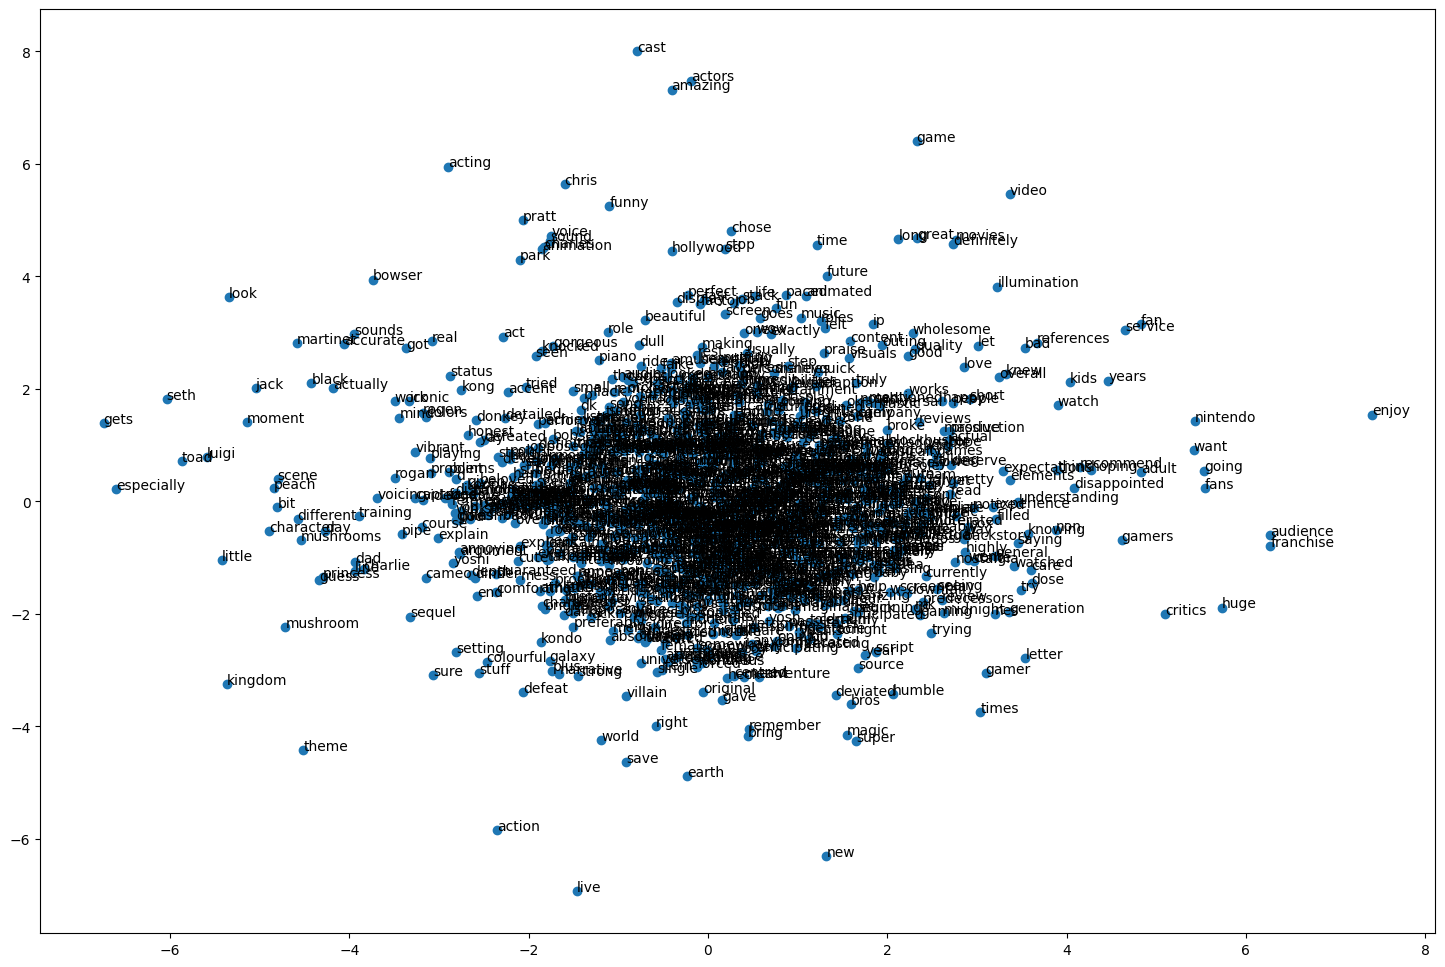

In [ ]:
# This program fits a 2D PCA model to the vectors and plots the projections and annotates the points with words
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

# Plot the projection
plt.figure(figsize=(18, 12))
plt.scatter(result[:, 0], result[:, 1])

# Annotate the points with words
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

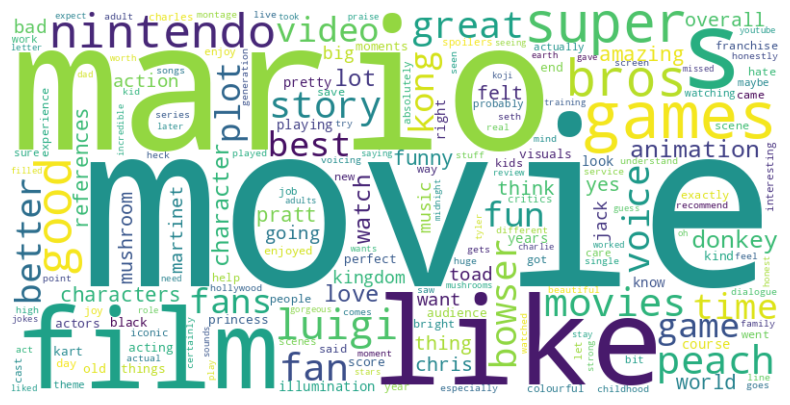

In [ ]:
# This programs visualizes the retrieved vocabulary and represents as a wordcloud

from wordcloud import WordCloud

# Visualize using word clouds
word_freq = {word: model.wv.get_vecattr(word, "count") for word in model.wv.key_to_index.keys()}
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)


# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

*Question 3 solution with other dataset as secondary example*

---




In [ ]:
# Write your code here
!pip install --upgrade gensim

In [ ]:
#This program utilizes another moview review dataset as a secondary example to build word embeddings model. Demonstrated a program such that the above requirements are met
#Size: 300 ( The number of dimensions of the embedding), e.g. the length of the dense vector to represent each token (word).
#window:5 (The maximum distance between a target word and words around the target word).
#min count: 10 (The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored).
#workers: 3 (The number of threads to use while training).
#sg: 0 or CBOW (The training algorithm, either CBOW (0) or skip gram (1)).
import pandas as pd
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from gensim.utils import tokenize
from gensim.parsing.preprocessing import STOPWORDS

# Read CSV file into DataFrame
df = pd.read_csv('another_movie_review_dataset.csv')
# Drop the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])
df.head(5)

Title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                              Review  
0  Though it may seem like just another Harry Pot...  
1  Nicole Holofcener's newest might seem slight i...  
2  Blake Edwards' bawdy comedy may not score a pe...  
3  Sidney Lumet's feature debut is a superbly wri...  
4  One of Disney's finest live-action adventures,...

In [ ]:
# Define a function for tokenization and contraction removal
def preprocess_text(text):
    # Expand contractions
    text = contractions.fix(text)
    # Tokenize the text and remove stopwords
    return [word for word in tokenize(text, lowercase=True) if word not in STOPWORDS]

# Preprocess text and split into sentences
sentences = [preprocess_text(review) for review in df['Review']]

In [ ]:
#print the sentences retreived from each review. Each sentence will be represented in between square brackets []
sentences

[['like',
  'harry',
  'potter',
  'knockoff',
  'percy',
  'jackson',
  'benefits',
  'strong',
  'supporting',
  'cast',
  'speedy',
  'plot',
  'plenty',
  'fun',
  'greek',
  'mythology'],
 ['nicole',
  'holofcener',
  's',
  'newest',
  'slight',
  'places',
  'rendering',
  'complex',
  'characters',
  'conflicted',
  'economic',
  'landscape',
  'varied',
  'natural',
  'touching'],
 ['blake',
  'edwards',
  'bawdy',
  'comedy',
  'score',
  'perfect',
  'dudley',
  'moore',
  's',
  'self',
  'deprecating',
  'performance',
  'makes',
  'midlife',
  'crisis',
  'persistently',
  'funny'],
 ['sidney',
  'lumet',
  's',
  'feature',
  'debut',
  'superbly',
  'written',
  'dramatically',
  'effective',
  'courtroom',
  'thriller',
  'rightfully',
  'stands',
  'modern',
  'classic'],
 ['disney',
  's',
  'finest',
  'live',
  'action',
  'adventures',
  'leagues',
  'sea',
  'brings',
  'jules',
  'verne',
  's',
  'classic',
  'sci',
  'fi',
  'tale',
  'vivid',
  'life',
  'fea

In [ ]:
#I have used default parameters for this model training

#size: (I have used 300 as asked in the question) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).
#window: (default 5) The maximum distance between a target word and words around the target word.
#min_count: (I have used 10) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
#workers: (default 3) The number of threads to use while training.
#sg: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).

# Train Word2Vec model with specified parameters
embedding_size = 300
min_count = 10
model = Word2Vec(sentences, vector_size=embedding_size, min_count=min_count)

In [ ]:
# This program retrieves the vocabulary size and gets word vectors
words = list(model.wv.key_to_index.keys())

# Get word vectors
word_vectors = [model.wv[word] for word in words]

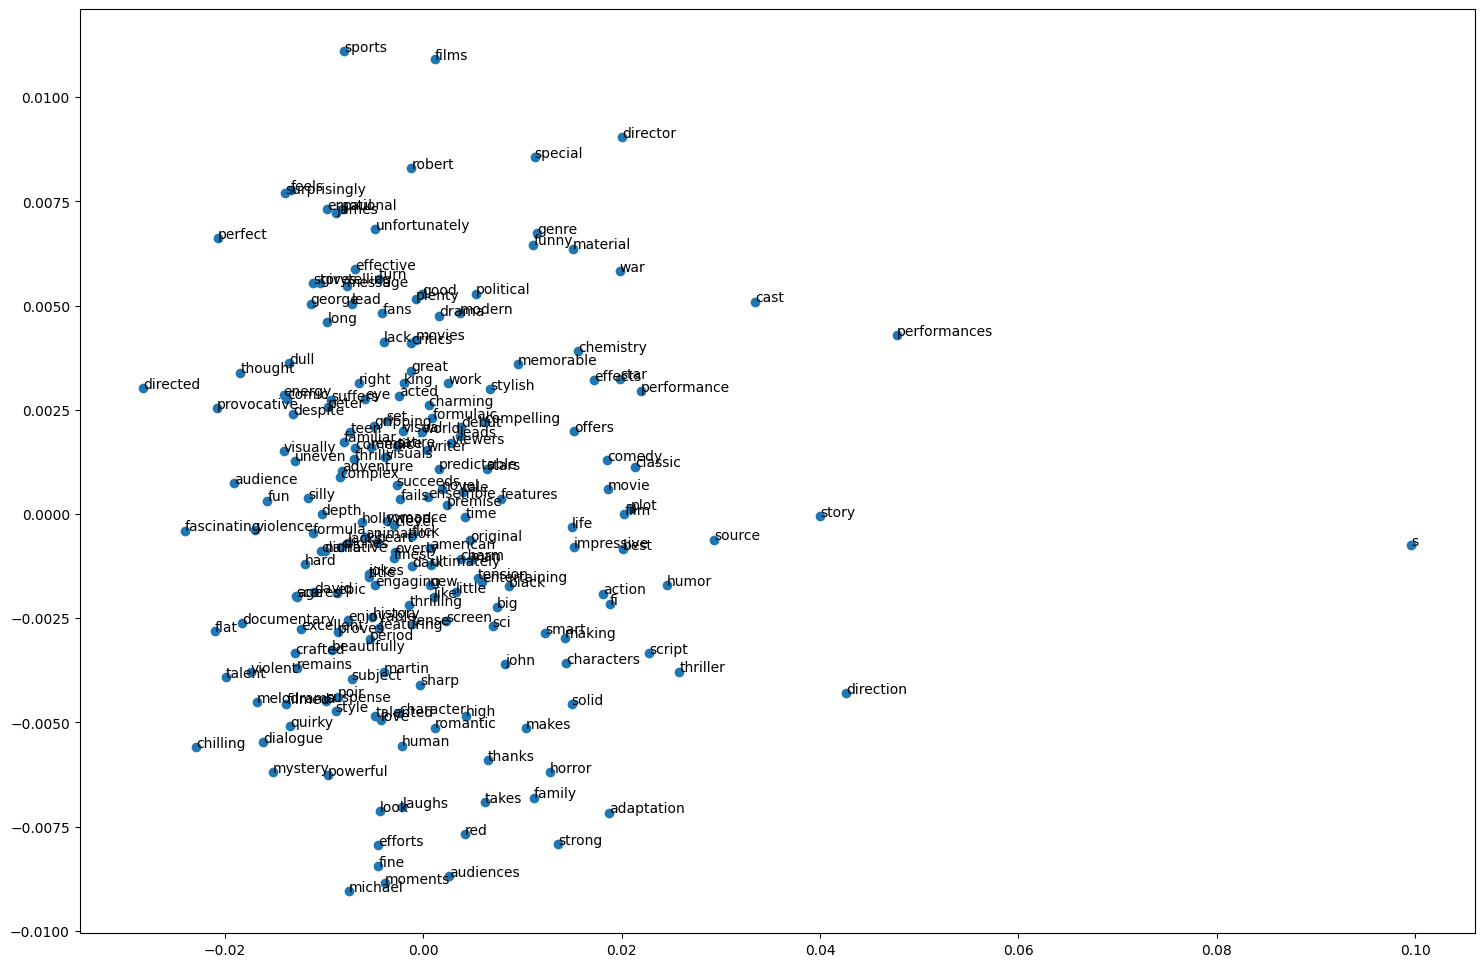

In [ ]:
# This program fits a 2D PCA model to the vectors and plots the projections and annotates the points with words
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

# Plot the projection
plt.figure(figsize=(18, 12))
plt.scatter(result[:, 0], result[:, 1])

# Annotate the points with words
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

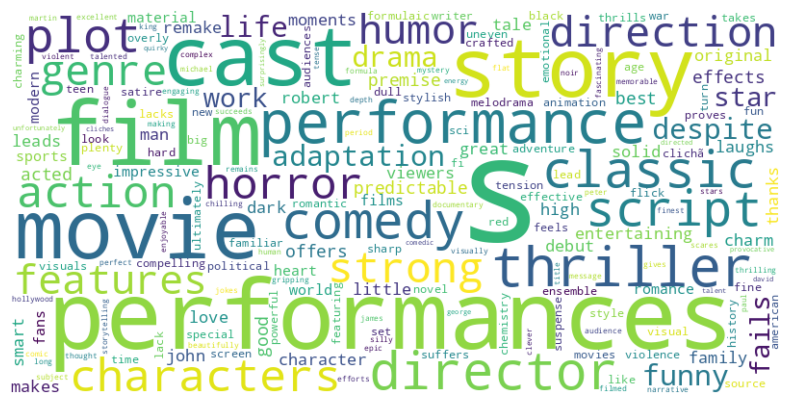

In [ ]:
# This programs visualizes the retrieved vocabulary and represents as a wordcloud
from wordcloud import WordCloud

# Visualize using word clouds
word_freq = {word: model.wv.get_vecattr(word, "count") for word in model.wv.key_to_index.keys()}
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)


# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/mdurgasrikari/Durga_Srikari_INFO5731_Spring2024/blob/main/Amazon_reviews_Assignment_3_Q4.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
'''
As part of this assignment, I learned how to conduct an N-gram analysis based on a dataset without using pre-existing libraries. As part of this, I learned how to implement through code
how to count the frequency of all N-grams, Calculate the probabilities for bigrams, and calculate the relative probabilities of all reviews. Also, I was able to implement the TF- IDF
and document representation by building document-terms weights, and rank documents from scratch without using any pre-existing libraries.In addition, I was able to implement one word
embedding model with the help of a data set by training and visualizing the 300 dimension word embedding. Finally, I was able to create a training evaluation data for sentiment analysis.

Challenges I faced include, as assignment 3 uses the data from the assignment 2. I did not know if any improvements were needed based on the Feedback from Assignment 2. As a result
I had to take another example to demonstrate each concept effectively.
'''